### Importing Libraries

In [11]:
import os
import pathlib 
import numpy as np
import matplotlib.pyplot as plt
import librosa 

### Download the data

In [ ]:
%pip install xeno-canto
!xeno-canto -dl cuculus-canorus
!xeno-canto -dl falco-tinnunculus
!xeno-canto -dl charadrius-hiaticula
!xeno-canto -dl athene-noctua
!xeno-canto -dl corvus-corax

### Importing Audio

In [3]:
data_dir = pathlib.Path("dataset/audio/")

In [4]:
import os
x = [name for name in os.listdir('dataset/audio/')] 
print(x)
files={}
label_dic={}
cnt = 0

for i in x:
    files[i]= list(data_dir.glob(f'{i}/*'))
    label_dic[i]= cnt
    cnt = cnt+1

['CommonCuckoo', 'CommonKestrel', 'CommonRingedPlover', 'LittleOwl', 'NorthernRaven']


In [5]:
files

{'CommonCuckoo': [WindowsPath('dataset/audio/CommonCuckoo/100628.mp3'),
  WindowsPath('dataset/audio/CommonCuckoo/100817.mp3'),
  WindowsPath('dataset/audio/CommonCuckoo/101485.mp3'),
  WindowsPath('dataset/audio/CommonCuckoo/101506.mp3'),
  WindowsPath('dataset/audio/CommonCuckoo/101800.mp3'),
  WindowsPath('dataset/audio/CommonCuckoo/102181.mp3'),
  WindowsPath('dataset/audio/CommonCuckoo/102280.mp3'),
  WindowsPath('dataset/audio/CommonCuckoo/103075.mp3'),
  WindowsPath('dataset/audio/CommonCuckoo/103305.mp3'),
  WindowsPath('dataset/audio/CommonCuckoo/103309.mp3'),
  WindowsPath('dataset/audio/CommonCuckoo/103316.mp3'),
  WindowsPath('dataset/audio/CommonCuckoo/103318.mp3'),
  WindowsPath('dataset/audio/CommonCuckoo/103322.mp3'),
  WindowsPath('dataset/audio/CommonCuckoo/103962.mp3'),
  WindowsPath('dataset/audio/CommonCuckoo/104086.mp3'),
  WindowsPath('dataset/audio/CommonCuckoo/104154.mp3'),
  WindowsPath('dataset/audio/CommonCuckoo/105508.mp3'),
  WindowsPath('dataset/audio/Com

### Preprocessing

In [6]:
def preemphasis(audio_signal):
    alpha = 0.96
    preemphasized_signal = np.append(
        audio_signal[0], audio_signal[1:]- alpha* audio_signal[:-1])
    return preemphasized_signal

def make_mel_spectrogram(audio_signal, sr):
    mel_spec = librosa.feature.melspectrogram(y = np.mean(audio_signal, axis =1), sr = sr, n_mels = 128)
    mel_spec = librosa.power_to_db(mel_spec)
    return mel_spec

def frame_nd_remove_silence(signal):
    frames = librosa.util.frame(signal, frame_length= 2048, hop_length= 512)
    frame_energy = np.sum(frames**2, axis = 1)
    frames_non_silent = frames[frame_energy>np.percentile(frame_energy,5)]
    return frames_non_silent

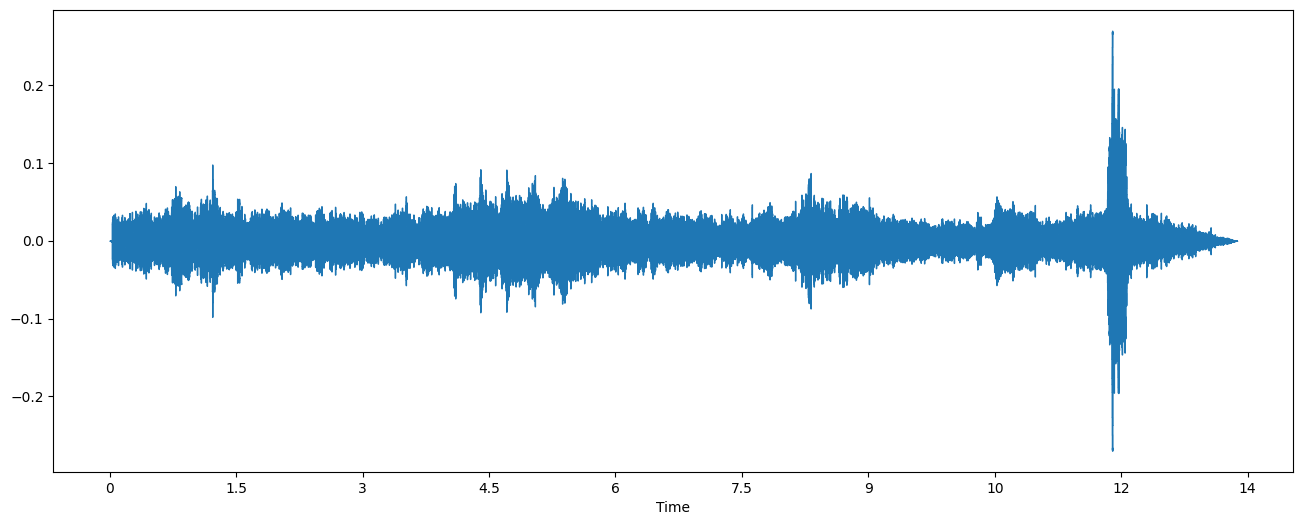

In [7]:
sample_audio = files['NorthernRaven'][0]
a, b = librosa.load(sample_audio)
plt.figure(figsize=(16,6))
librosa.display.waveshow(y = a, sr = b)

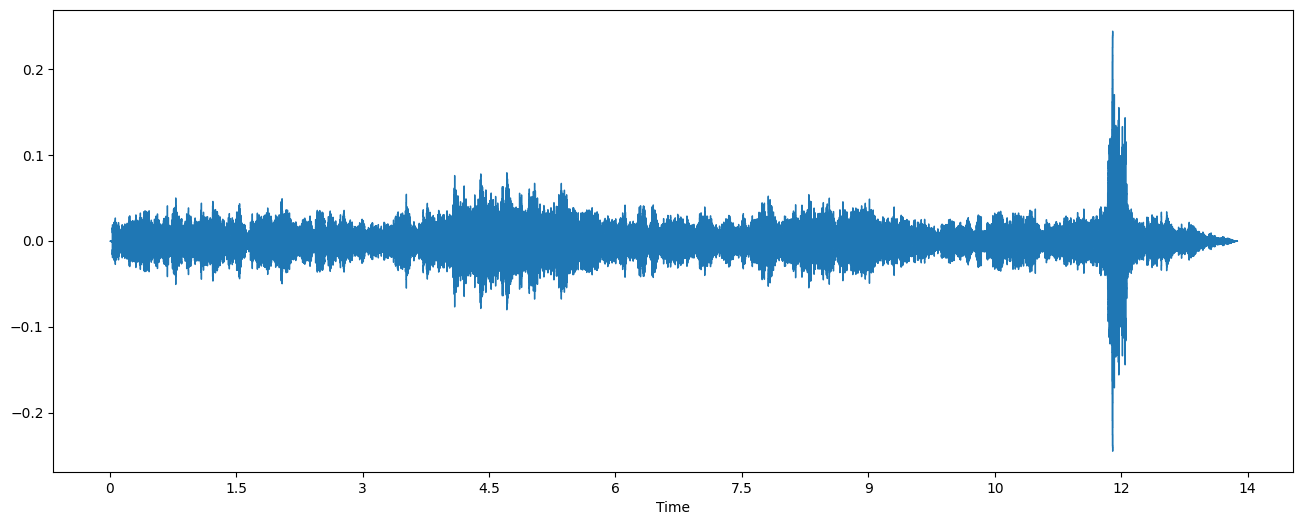

In [8]:
pre_a = preemphasis(a)
plt.figure(figsize=(16,6))
librosa.display.waveshow(y=pre_a, sr = b)

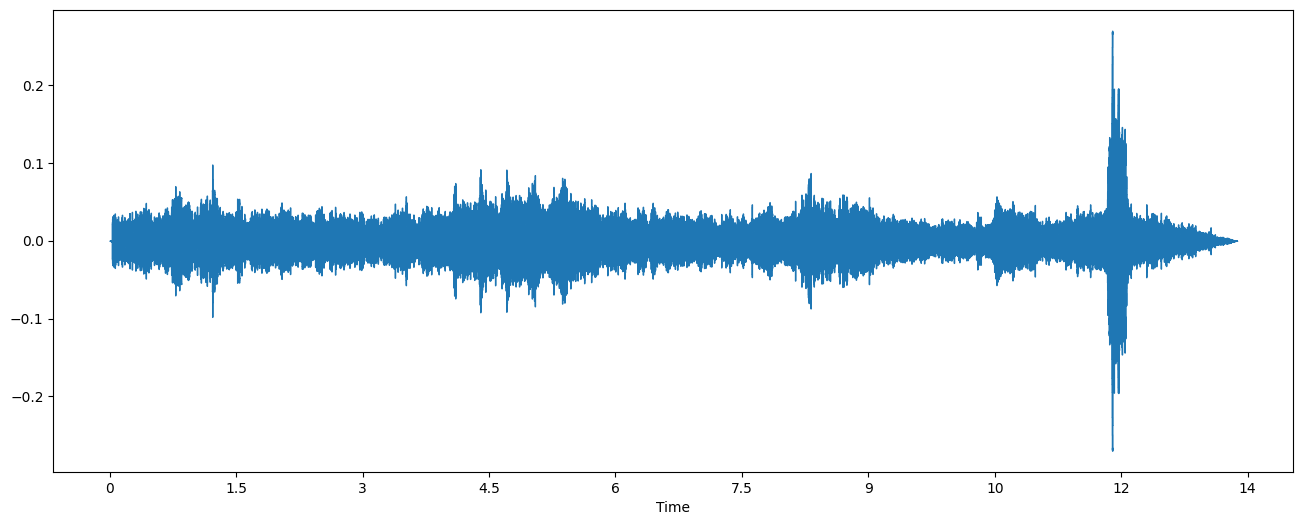

In [9]:
framed_a = frame_nd_remove_silence(pre_a)
plt.figure(figsize=(16,6))
librosa.display.waveshow(y=a, sr=b)

### Generating Mel Spectrograms 

c:\Users\jAsl33N KAuR\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1945
  warnings.warn(


KeyboardInterrupt: 

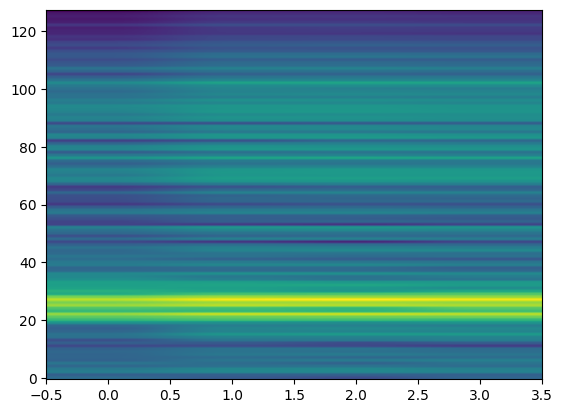

In [10]:
try:
    for bird in files:
        i =0
        for audio in files[bird]:
            signal, sr = librosa.load(audio)
            preemphasized_signal = preemphasis(signal)
            # frame nd silence remove from the audio
            framed_signal = frame_nd_remove_silence(preemphasized_signal)
            # make the mel_spectrogram of formed audio signal
            mel_spectrogrm = make_mel_spectrogram(framed_signal, sr)
            if not os.path.exists('dataset/Spectrograms/' + bird):
                os.makedirs('dataset/Spectrograms/' + bird)
        
            # plt.figure(figsize=(16,6))
            plt.imshow(mel_spectrogrm, origin='lower', aspect='auto', cmap = 'viridis')
            # plt.colorbar(format='%+2.0f dB')
            # plt.title('mel spectrogram')
            # plt.tight_layout()
            plt.savefig('dataset/Spectrograms/'+ bird + '/' + str(i) + '.png', format='png')
            plt.close()
            if(i==200):
                break
            i = i+1 
except Exception as e:
    print("An error occurred: {}".format(e))